`Final Project Submission`

Please fill out:
* Student name: `Hua Shi`
* Student pace: `full time`
* Scheduled project review date/time: 
* Instructor name: `SeanAbu Wilson`
* Blog post URL: 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Load the data 

In [2]:
target=pd.read_csv('training_set_labels.csv').sort_values(by='id')
features=pd.read_csv('Training_set_values.csv').sort_values(by='id')

In [3]:
target.head()

,id,status_group
9410,0,non functional
18428,1,functional
12119,2,functional
10629,3,functional
2343,4,non functional


In [4]:
# check frist 5 row of train data
features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
9410,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
18428,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
12119,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
10629,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2343,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
target.shape

(59400, 2)

In [6]:
features.shape

(59400, 40)

In [7]:
df=target.merge(features,on='id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


# Data Cleaning

In [8]:
# to see which columns have missing values
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [9]:
# check missing values
missing=pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns=['feature','missing_values']
missing.head()

,feature,missing_values
0,id,0
1,status_group,0
2,amount_tsh,0
3,date_recorded,0
4,funder,3635


In [10]:
# delete the columns which contains more than 20% missing values
col_names=[]
for i in range(len(missing)):
    if missing['missing_values'][i]/len(df)<=0.2:
        col_names.append(missing['feature'][i])
print(col_names)

['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [11]:
# remove all missing data 
df1=df[col_names].dropna(axis=0)
df1.shape

(48288, 40)

In [12]:
# double check if there are 
df1.isnull().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [13]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# Feature Engingeering 

## Target

In [14]:
# give value for status group and create a new column called target 
df1['target']=df1['status_group'].map({'functional':1,
                                        'functional needs repair':2,
                                        'non functional':0})
df1['target'].value_counts()

1    26517
0    18273
2     3498
Name: target, dtype: int64

In [15]:
df1.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,0


In [16]:
df1.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'target'],
      dtype='object')

## inputs

In [18]:
from sklearn import  preprocessing

In [19]:
# create a function to transform the data 
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [20]:
df1['date_recorded']=df1['date_recorded'].apply(lambda x : x[:4] )

In [21]:
for i in df1.columns:
    df1[i]=encode(df1[i])

In [22]:
df1.info

<bound method DataFrame.info of           id  status_group  amount_tsh  date_recorded  funder  gps_height  \
2          0             0           0              2     708          59   
3          1             0           8              4     372        1697   
4          2             2           0              2     170          59   
5          3             0          17              2    1052          87   
6          4             2           0              3     387          59   
...      ...           ...         ...            ...     ...         ...   
59395  48283             0           0              4    1560        1241   
59396  48284             0           0              2     212          59   
59397  48285             2           0              3     806        1246   
59398  48286             2          17              2    1169        1486   
59399  48287             2          17              4     813        1023   

       installer  longitude  latitude  wpt_

In [23]:
df2=df1.drop(columns=['id','status_group']) # frop ID and status_group

# Declare target and inputs

In [24]:
drop_list=['target','num_private','wpt_name','quantity_group','construction_year','management_group','subvillage']

In [25]:
inputs=df2.drop(columns=drop_list)
inputs.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2,0,2,708,59,781,28012,19758,8,2,0,...,4,5,6,2,2,3,0,0,2,1
3,8,4,372,1697,163,33459,39657,5,6,2,...,4,5,6,2,1,8,6,0,1,1
4,0,2,170,59,188,28221,20559,8,2,0,...,6,6,6,2,0,7,5,0,4,3
5,17,2,1052,87,1162,45418,16281,8,14,23,...,4,5,6,2,1,3,0,0,2,1
6,0,3,387,59,476,11901,31535,0,17,16,...,0,2,6,2,3,7,5,0,6,5


In [26]:
target=df2.target

# Distribution of features

## Distribution of Target

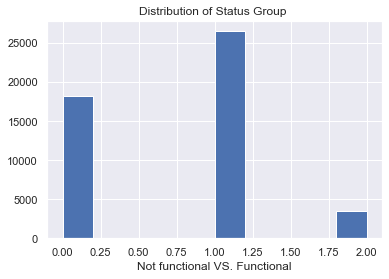

In [27]:
plt.hist(target)
plt.title("Distribution of Status Group ")
plt.xlabel("Not functional VS. Functional")
plt.xticks([0,1,2])
plt.show()

## Distribution of  Inputs

In [28]:
len(inputs.columns)

32

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


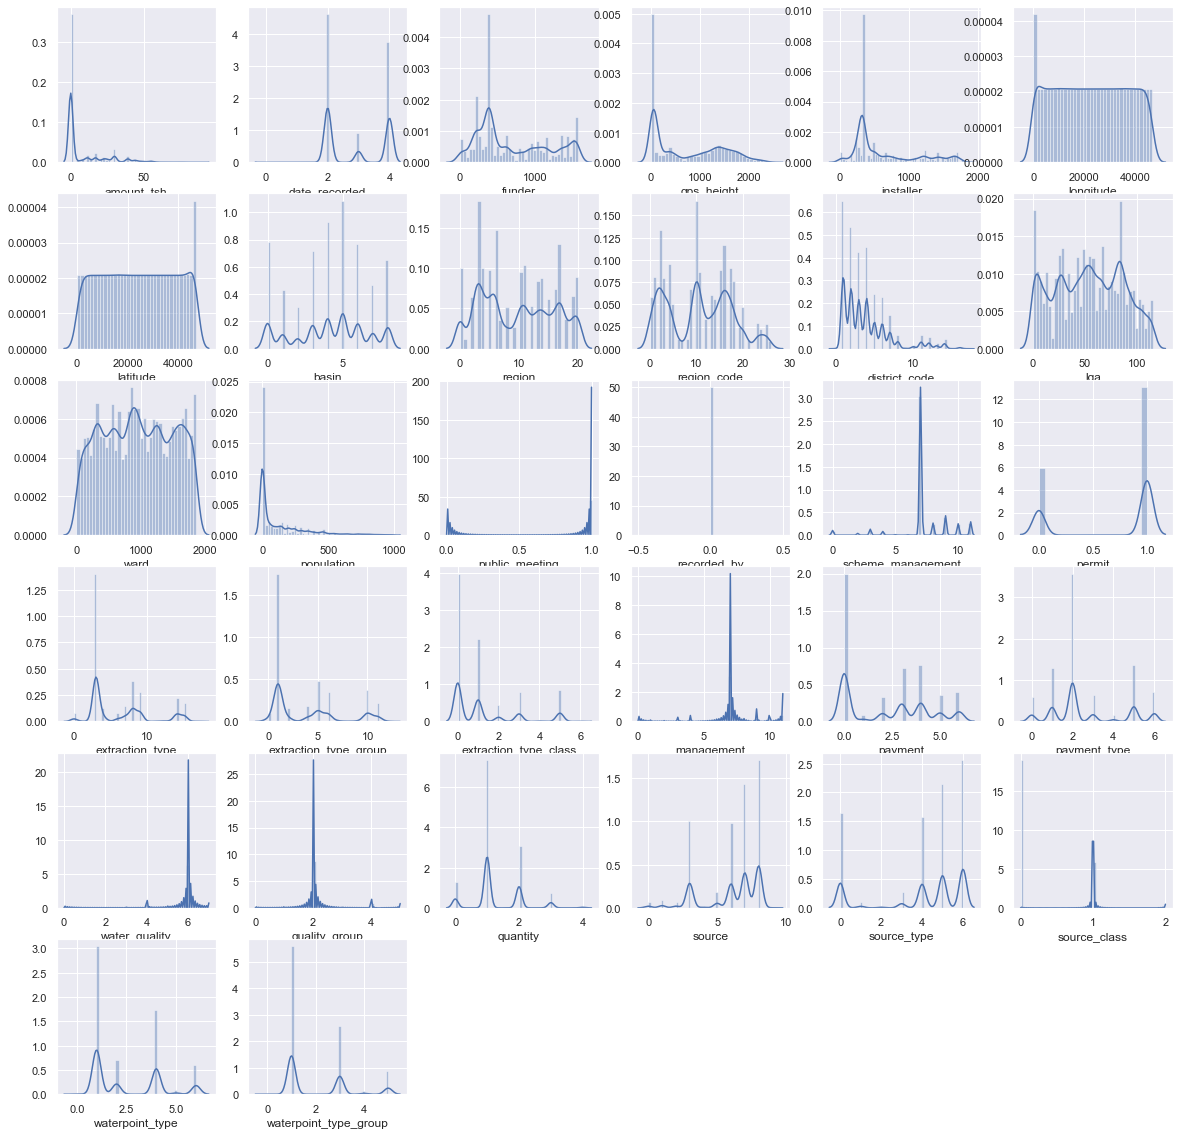

In [30]:
# loop distribution plot for inputs
plt.figure(figsize=(20,20))
plt.title('Distribution of Features')
for i in range(0,len(inputs.columns)):
    plt.subplot(6,6,i+1)
    sns.distplot(inputs[inputs.columns[i]])

# Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, random_state=10,test_size=0.2)


In [32]:
x_train=pd.DataFrame(data=x_train, columns=x_train.columns)
x_test=pd.DataFrame(data=x_test, columns=x_train.columns)

# Feature Selection

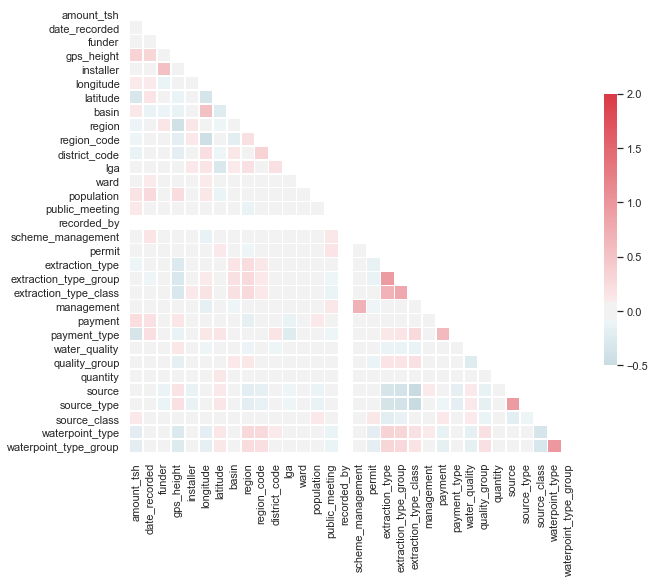

In [33]:

sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [34]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)
feature_columns=x_train.columns

In [35]:
x_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

In [36]:
len(x_test.columns)


31

In [37]:
len(inputs.columns)

32

` one columns got removed column `

# Oversampling

In [38]:
 y_train.value_counts()

1    21235
0    14606
2     2789
Name: target, dtype: int64

In [39]:
from sklearn.utils import resample
# concatenate our training data back together
training  = pd.DataFrame()
training[list(x_train.columns)]=x_train
training['target']=y_train
training.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,target
587,17,2,247,69,322,43409,22503,5,20,3,...,4,5,4,4,2,6,4,1,2,1
50574,0,4,1175,59,322,0,46917,4,17,16,...,1,4,6,2,1,7,5,0,4,1
26192,0,4,212,1403,1424,3348,35253,3,5,15,...,6,6,7,5,2,7,5,0,4,1
56193,39,4,212,633,279,34144,631,7,16,9,...,2,0,6,2,1,6,4,1,1,1
32976,0,2,52,49,35,45344,15135,6,14,5,...,0,2,6,2,1,7,5,0,4,1


In [40]:
# separate minority and majority classes
not_func= training[training.target==0]
func= training[training.target==1]
func_rep= training[training.target==2]

In [41]:
# Get a class count to understand the class imbalance.
print('not funtional count: '+ str(len(not_func)))
print('funtional count: '+ str(len(func)))
print('functional but need to repair count: '+ str(len(func_rep)))

not funtional count: 14606
funtional count: 21235
functional but need to repair count: 2789


In [42]:
# upsample minority
not_func_upsampled = resample(not_func,
                          replace=True, # sample with replacement
                          n_samples=len(func), # match number in majority class
                          random_state=23) # reproducible results
not_func_upsampled.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,target
4033,0,2,437,59,322,6563,42232,4,4,17,...,3,1,6,2,3,7,5,0,6,0
6193,0,4,355,464,415,41764,1672,7,12,25,...,6,6,6,2,0,7,5,0,6,0
27371,0,4,387,1769,322,35792,38172,5,6,2,...,0,2,6,2,1,8,6,0,6,0
15187,0,2,387,477,322,39591,25373,5,20,3,...,0,2,6,2,1,6,4,1,1,0
53581,0,3,387,59,322,13890,26946,0,19,13,...,0,2,6,2,2,0,1,1,0,0


In [43]:
# upsample minority
func_rep_count_upsampled = resample(func_rep,
                          replace=True, # sample with replacement
                          n_samples=len(func), # match number in majority class
                          random_state=23) # reproducible results
func_rep_count_upsampled.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,target
17955,23,2,1043,499,1155,33239,17830,8,11,4,...,3,1,6,2,2,7,5,0,4,2
7851,0,4,806,1980,322,35175,41918,0,0,1,...,5,3,6,2,2,6,4,1,6,2
56299,0,2,1558,59,820,34004,18528,8,11,4,...,0,2,4,4,2,3,0,0,1,2
20469,25,4,993,1222,1098,1562,26948,3,5,15,...,3,1,6,2,1,6,4,1,1,2
24586,0,2,1528,59,474,28938,15668,6,2,0,...,0,2,6,2,2,8,6,0,2,2


In [44]:
# combine majority and upsampled minority
upsampled= pd.concat([func, not_func_upsampled,func_rep_count_upsampled])
upsampled.target.value_counts()

2    21235
1    21235
0    21235
Name: target, dtype: int64

In [45]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [46]:
x_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

In [47]:
x_test.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

# data standardization

In [48]:
#import library for data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)  

# KNN Model

## Import libraries

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


## RandomizedSearchCV

In [58]:
random_gridknn={'n_neighbors':[1,100,200]}

In [59]:
knn= KNeighborsClassifier()

In [60]:
gs_knn=GridSearchCV(knn,random_gridknn,cv=10)

In [61]:
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 100, 200]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [62]:
gs_knn.best_params_,gs_knn.best_score_

({'n_neighbors': 1}, 0.9046387563151024)

## Final KNN model 

In [63]:
knn_final= KNeighborsClassifier(n_neighbors=1)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
y_train_pre=knn_final.predict(X_train)

In [67]:
print('accuracy_score of train data :{}'.format (accuracy_score(y_train,y_train_pre)))
print('f1_score of train data:{}'.format(f1_score(y_train,y_train_pre,average='macro'))) 
# # make class predictions for the testing set


accuracy_score of train data :0.9919158621772232
f1_score of train data:0.9919103986732508


In [68]:
y_pred_class = knn_final.predict(X_test)
print('accuracy_score of test data :{}'.format (accuracy_score(y_test, y_pred_class)))
print('f1_score of test data:{}'.format(f1_score(y_test, y_pred_class,average='macro')) )

accuracy_score of test data :0.754711120314765
f1_score of test data:0.643833299077048
